# Event View- and Label-Interface

In this tutorial, we show how we use the EventInterface class for viewing and labeling events.

In [1]:
import cait as ai
%config InlineBackend.figure_formats = ['svg']  # we need this for a suitable resolution of the plots

First we create a new instance of the class and specify the number of channels in the data.

In [2]:
ei = ai.EventInterface(nmbr_channels=2)

Event Interface Instance created.


Now we need to define the path to an HDF5 file, as well as the channel numbers within the original RDT or CSMPL file. These are needed for the automatically created file appendix, that can be activated with the argument appendix. In the last argument, we define which events we want to watch, usually this list will just contain one string argument, but yoyu could also put multiple ('testpulses', 'events', 'niose').

In [7]:
ei.load_h5(path='test_data/', fname='test_001', channels=[0,1], appendix=False, which_to_label=['events'])

Nmbr triggered events:  160
Nmbr testpulses:  480
Nmbr noise:  160
HDF5 File loaded.


As the EventInterface was mainly supposed to be used for the per-hand labeling of events, we need to create a csv file first, in that we will store the labels. A full list of labels is printed in the docstring of the label interface. 

In [8]:
ei.create_labels_csv(path='test_data/')

If we have already created a label csv file, we can at a second instanciation of the EventInterface load this file with ei.load_labels_csv(path='test_data/'). It is a common mistake, to accidentally overwrite labels, by calling the function creat_labels_csv. We are currently thinking about a method to reduce this risk, probably an ask for confirmation by user input.

In the EventInterface we can also view the filtered and fitted events. For this we need to load the optimum filter transfer function and the standard event parameters to the instance.

In [9]:
ei.load_of()
ei.load_sev_par(name_appendix='_down{}'.format(4))

Added the optimal transfer function.
Added the sev fit parameters.


Now we start the interface for labeling and viewing events. The interface has an options menu with multiple methods to increase the interpretability of events.

Just click trough the menu!

Start labeling from idx 0.


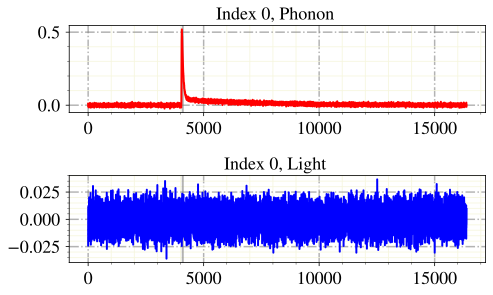

Label Phonon: 0.0
Label Light: 0.0
Enter q end, b back, n next, o options, i idx, p for (de)activate label listn
Skipping this label.


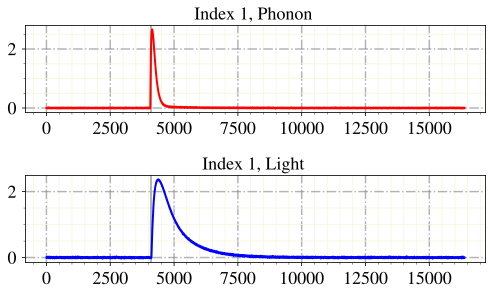

Label Phonon: 0.0
Label Light: 0.0
Enter q end, b back, n next, o options, i idx, p for (de)activate label listo
---------- OPTIONS: ----------
down ... downsample
der ... show derivative of event
mp ... show main parameters
triang ... show triangulation
of ... show filtered event
sev ... show fitted standardevent
arr ... show fitted array
sat ... show fitted event with saturation
threshold ... show the trigger threshold
xlim ... set the x limit
ylim ... set the y limit
sub ... subtract offset
time ... plot time instead of sample index
window ... include window in of filtering
q ... quit options menu
Choose option or q(uit): sev
Show SEV fit set to:  True
Choose option or q(uit): q
Quit options menu.


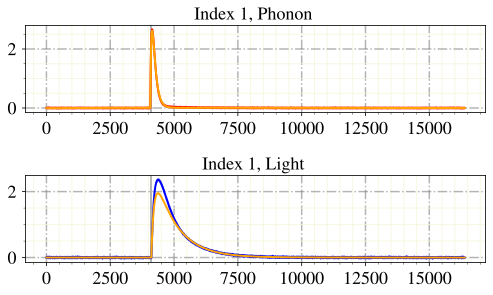

Label Phonon: 0.0
Label Light: 0.0
Enter q end, b back, n next, o options, i idx, p for (de)activate label listo
---------- OPTIONS: ----------
down ... downsample
der ... show derivative of event
mp ... show main parameters
triang ... show triangulation
of ... show filtered event
sev ... show fitted standardevent
arr ... show fitted array
sat ... show fitted event with saturation
threshold ... show the trigger threshold
xlim ... set the x limit
ylim ... set the y limit
sub ... subtract offset
time ... plot time instead of sample index
window ... include window in of filtering
q ... quit options menu
Choose option or q(uit): sev
Show SEV fit set to:  False
Choose option or q(uit): mp
Show Main Parameters set to:  True
Choose option or q(uit): q
Quit options menu.


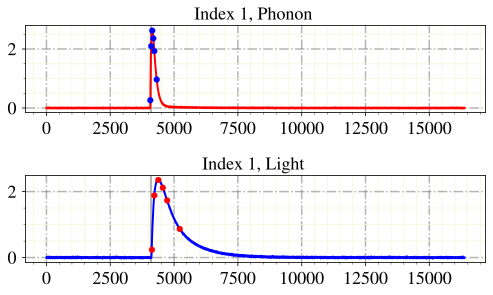

Label Phonon: 0.0
Label Light: 0.0
Enter q end, b back, n next, o options, i idx, p for (de)activate label listo
---------- OPTIONS: ----------
down ... downsample
der ... show derivative of event
mp ... show main parameters
triang ... show triangulation
of ... show filtered event
sev ... show fitted standardevent
arr ... show fitted array
sat ... show fitted event with saturation
threshold ... show the trigger threshold
xlim ... set the x limit
ylim ... set the y limit
sub ... subtract offset
time ... plot time instead of sample index
window ... include window in of filtering
q ... quit options menu
Choose option or q(uit): mp
Show Main Parameters set to:  False
Choose option or q(uit): of
Show filtered set to:  True
Choose option or q(uit): q
Quit options menu.


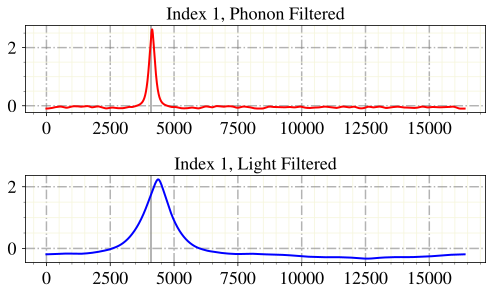

Label Phonon: 0.0
Label Light: 0.0
Enter q end, b back, n next, o options, i idx, p for (de)activate label listo
---------- OPTIONS: ----------
down ... downsample
der ... show derivative of event
mp ... show main parameters
triang ... show triangulation
of ... show filtered event
sev ... show fitted standardevent
arr ... show fitted array
sat ... show fitted event with saturation
threshold ... show the trigger threshold
xlim ... set the x limit
ylim ... set the y limit
sub ... subtract offset
time ... plot time instead of sample index
window ... include window in of filtering
q ... quit options menu
Choose option or q(uit): q
Quit options menu.


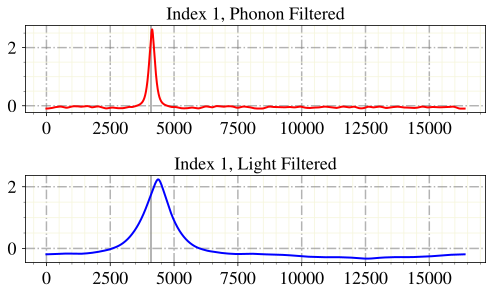

Label Phonon: 0.0
Label Light: 0.0
Enter q end, b back, n next, o options, i idx, p for (de)activate label listq
End labeling.


In [10]:
ei.start(start_from_idx=0, print_label_list=False, viewer_mode=True)

When we are done with labeling, we can include the labels in the HDF5 file to access them as flags for any cuts or training of supevised machine learning methods.

In [11]:
channels_rdt = [0,1]
dh = ai.DataHandler(channels=channels_rdt)
dh.set_filepath(path_h5='test_data/',
                fname='test_001',
                appendix=False)  # this specifies, that the file does not have a "-P_Ch0..." appendix

dh.import_labels(path_labels='test_data/')

DataHandler Instance created.
Added Labels.


The labeling can be done by a neural network. We typically use networks of the "graduate student" model family. These are well suited for the task due to their undergraduate degree in physics. They are however not very fast (0.01-0.1 Hz labeling frequency), not very accurate (1-5% wrong labels in the data set) and quite expensive (need accommodation, health insurrance, paid leave, ...). Therefore we are currently experimenting with data augmentation to replace such models with purely simulated, labeled data.

<tr>
<td> <img src="../logo/damir.jpg" alt="Damir" style="height: 150px;"/> </td>
<td> <img src="../logo/daniel.jpg" alt="Daniel" style="height: 150px;"/> </td>
<td> <img src="../logo/felix.jpg" alt="Felix" style="height: 150px;"/> </td>    
</tr>

Fig. 1: Schematic visualization of graduate student-type neural networks "Damir" (left), "Daniel" (middle) and "Felix" (right).

Please forward questions and correspondence about this notebook to damir.rizvanovic(at)oeaw.ac.at or felix.wagner(at)oeaw.ac.at.